## UTM-Hanoi dataset validation 

This notebook compares the statistics in our Hanoi-UTM data with the survey data from: 

1. Bray, D., & Holyoak, N. (2015, October). Motorcycles in developing Asian cities: A case study of Hanoi. In 37th Australasian Transport Research Forum, unpublished conference paper.

2. Hoai Anh, T., & Schlyter, A. (2010). Gender and class in urban transport: the cases of Xian and Hanoi. Environment and Urbanization, 22(1), 139-155. doi:10.1177/0956247810363526

3. Ngoc, A. M., Nishiuchi, H., Van Truong, N., & Huyen, L. T. (2022). A comparative study on travel mode share, emission, and safety in five Vietnamese Cities. International Journal of Intelligent Transportation Systems Research, 1-13.

3. Hoang-Tung, N. (2023). Recognizing the Involvement of Satisfaction in Nurturing Habits of Travel Mode Use. International Journal of Intelligent Transportation Systems Research, 1-17.

4. Truong, L. T., Tay, R., & Nguyen, H. T. (2021). Investigating health issues of motorcycle taxi drivers: A case study of Vietnam. Journal of Transport & Health, 20, 100999.

5. Hoang-Tung, N., Linh, H. T., Cuong, H. V., Binh, P. L., Takeda, S., & Kato, H. (2022). Ride-hailing service adoption and local context in motorcycle-based societies: case study in Hanoi, Vietnam. Sustainability, 14(2), 728.

6. Hoang-Tung, N. (2023). Recognizing the Involvement of Satisfaction in Nurturing Habits of Travel Mode Use. International Journal of Intelligent Transportation Systems Research, 1-17.


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go


In [13]:
df = pd.read_csv('../Data/hn_survey_26k.csv')
df.head()

,rowid,id,age,occup,gender,origlat,origlon,destlat,destlon,purp,...,alt_taxi,alt_walk,opinion_car,opinion_motob,opinion_ebike,opinion_bike,opinion_taxi,opinion_bus,opinion_ban,index
0,1,81355306,56_75,retired,female,21.017745,105.789006,20.991929,105.805990,visit,...,0,0,bad,bad,good,good,bad,bad,agree,1
1,2,84299385,18_25,student,male,21.042960,105.805248,21.046880,105.785251,education,...,0,0,neutral,neutral,neutral,neutral,neutral,neutral,disagree,1
2,3,84733115,18_25,student,female,20.989184,105.795480,20.989289,105.795570,education,...,0,0,verygood,good,good,good,good,good,disagree,1
3,4,81532595,18_25,student,male,21.006678,105.825425,21.006742,105.825081,education,...,0,0,bad,bad,neutral,neutral,neutral,neutral,disagree,1
4,5,84300298,18_25,private,female,21.031790,105.801981,21.034103,105.795577,work,...,0,0,neutral,neutral,neutral,neutral,neutral,neutral,neutral,1


# Step 1: Gender and age distributions

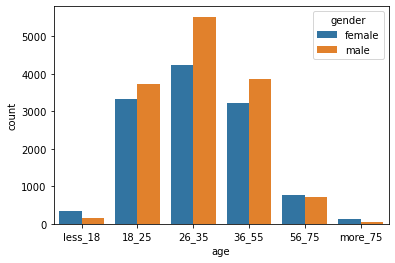

In [16]:
countplot0 = sns.countplot(x='age', data=df, hue= 'gender', order=['less_18','18_25','26_35', '36_55', '56_75', 'more_75']);

fig = countplot0.get_figure()

fig.savefig('../Figures/age_gender.pdf')


### Step 1.3: Occupation



In [17]:
occdf = df.occup.value_counts()/df.shape[0]*100
occdf

state      32.494446
private    25.725887
fdi        23.362445
student    14.383667
retired     4.033556
Name: occup, dtype: float64

In [31]:
occ = ['state','private', 'foreign', 'student','retired/unemployed']

fig = go.Figure()
fig.add_trace(go.Bar(x=occ,
                y=[32,26,23,14,4],
                name='Hanoi-UTM',
                marker_color='green'
                ))
fig.add_trace(go.Bar(x=occ,
                y=[29,28,7,0,10],
                name='UNDP 2010',
                marker_color='blue'
                ))

fig.update_layout(
    #title='Modal share statistic in 3 different studies',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Percentage',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0.8,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()
fig.write_image('../Figures/occ_stats.pdf')

# Step 2: Trip purpose 


In [24]:
purpcount = df.purp.value_counts()/ df.shape[0]*100
purpcount

work         58.013483
education    17.214433
visit        12.165786
shopping      7.362292
leisure       3.577722
caring        1.666284
Name: purp, dtype: float64

In [30]:
purp = ['work','education','visit','shopping', 'caring', 'leisure']

fig = go.Figure()
fig.add_trace(go.Bar(x=purp,
                y=[58,17,12,7,2,4],
                name='Hanoi-UTM',
                marker_color='green'
                ))
fig.add_trace(go.Bar(x=purp,
                y=[50,9,0,15,0,20],
                name='Hoai Anh and Schlyter 2010',
                marker_color='blue'
                ))


fig.update_layout(
    #title='Modal share statistic in 3 different studies',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Percentage',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0.6,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()
fig.write_image('../Figures/purpose.pdf')

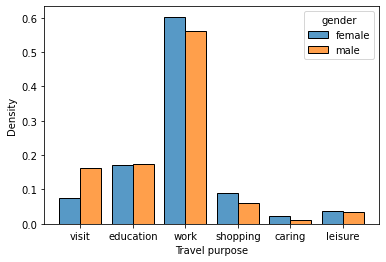

In [27]:
#countplot0 = sns.countplot(x='purp', data=df, hue= 'gender', order=['work','education','shopping', 'caring', 'leisure']);

#fig = countplot0.get_figure()

x,y = 'purp', 'gender'

ax = sns.histplot(x = df['purp'], hue=df['gender'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)#, hue_order=['work','education','shopping', 'caring', 'leisure']);
ax.set_xlabel('Travel purpose')

fig = ax.get_figure()

fig.savefig('../Figures/purpose_gender.pdf')



# Step 2: Mode share

In [20]:
modecount = df.vehic.value_counts()/ df.shape[0]

In [21]:
mode = ['moto','car', 'bus', 'walk','taxi', 'bike', 'ebike']

fig = go.Figure()
fig.add_trace(go.Bar(x=mode,
                y=[57,27,2,2,1,5,6],
                name='Hanoi-UTM',
                marker_color='green'
                ))
fig.add_trace(go.Bar(x=mode,
                y=[72,7,9,0,3,4,0],
                name='Ngoc et al 2020',
                marker_color='red'
                ))
fig.add_trace(go.Bar(x=mode,
                y=[58,3,3,0,15,0],
                name='Hoai Anh and Schlyter 2010',
                marker_color='gold'
                ))
fig.add_trace(go.Bar(x=mode,
                y=[85,12,1,0,2,0],
                name='Bray and Holyoak 2015',
                marker_color='black'
                ))

fig.add_trace(go.Bar(x=mode,
                y=[77,14,9,0,0,0],
                name='Vu and Preston 2022',
                marker_color='magenta'
                ))

fig.add_trace(go.Bar(x=mode,
                y=[65,26,9,1,0,0],
                name='Nguyen et al 2019',
                marker_color='blue'
                ))

fig.add_trace(go.Bar(x=mode,
                y=[64,4,7,1,25,0],
                name='JICA 2007',
                marker_color='orange'
                ))

fig.update_layout(
    #title='Modal share statistic in 3 different studies',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Percentage',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0.6,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()
fig.write_image('../Figures/modeshare.pdf')


# Step 3: Vehicle ownership

In [32]:
df_x = df.replace(['more_5'],7)
df_x.own_car = pd.to_numeric(df_x.own_car)
df_x.own_motob = pd.to_numeric(df_x.own_motob)
df_x.own_bike = pd.to_numeric(df_x.own_bike)
df_x.own_ebike = pd.to_numeric(df_x.own_ebike)

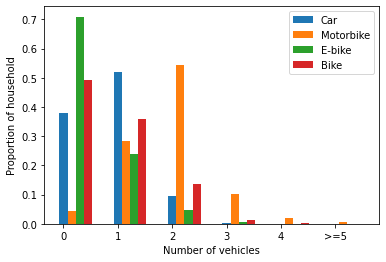

In [49]:
x1= df_x.value_counts("own_car", normalize = True)
x1.sort_index(inplace=True)
x2 = df_x.value_counts("own_motob", normalize = True)
x2.sort_index(inplace=True)
x3 = df_x.value_counts("own_ebike", normalize = True)
x3.sort_index(inplace=True)
x4 = df_x.value_counts("own_bike", normalize = True)
x4.sort_index(inplace=True)

loc1 = [0,1,2,3,4,5]
loc2 = [x+0.15 for x in loc1]
loc3 = [x+0.3 for x in loc1]
loc4 = [x+0.45 for x in loc1]

# Width of a bar 
width = 0.15

plt.bar(loc1, x1.values, width, label = 'Car')
plt.bar(loc2 , x2.values,width, label = 'Motorbike')
plt.bar(loc3 , x3.values,width, label = 'E-bike')
plt.bar(loc4 , x4.values,width, label = 'Bike')

plt.xlabel("Number of vehicles")
plt.ylabel("Proportion of household")
#plt.title('People opinion on cars as their alternative vehicle, versus their opinion on the motorbike ban')
plt.legend()
plt.xticks(loc1, ['0', '1', '2', '3', '4','>=5'])
plt.savefig('../Figures/Own_vehicle.pdf')  
plt.show()

# Step 5: Satisfactory with travel modes

In [55]:
df.opinion_motob.fillna('Missing')
df.opinion_car.fillna('Missing')
df.opinion_bus.fillna('Missing')

custom_dict = {'very bad': 0, 'bad': 1, 'neutral': 3, 'good': 4, 'very good': 5} 

x1= df.value_counts("opinion_motob", normalize = True)
x1.sort_index(key=lambda x: x.map(custom_dict), inplace=True)
x2 = df.value_counts("opinion_car", normalize = True)
x2.sort_index(key=lambda x: x.map(custom_dict), inplace=True)
x3 = df.value_counts("opinion_bus", normalize = True)
x3.sort_index(key=lambda x: x.map(custom_dict), inplace=True)

In [72]:

opinions = ['very bad', 'bad', 'neutral', 'good', 'very good']

fig = go.Figure()
fig.add_trace(go.Bar(x=opinions,
                y=[3,6,38,49,3],
                name='Hanoi-UTM',
                marker_color='green'
                ))
fig.add_trace(go.Bar(x=opinions,
                y=[5,17,33,33,7],
                name='Nguyen 2023',
                marker_color='blue'
                ))


fig.update_layout(
    #title='Modal share statistic in 3 different studies',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Percentage',
        titlefont_size=16,
        tickfont_size=16,
    ),
    legend=dict(
        x=0.1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)',
        font=dict(size=16)
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()
fig.write_image('../Figures/opinion_motob.pdf')

In [71]:

opinions = ['very bad', 'bad', 'neutral', 'good', 'very good']

fig = go.Figure()
fig.add_trace(go.Bar(x=opinions,
                y=[4,5,33,21,4],
                name='Hanoi-UTM',
                marker_color='green'
                ))
fig.add_trace(go.Bar(x=opinions,
                y=[6,22,42,18,5],
                name='Nguyen 2023',
                marker_color='blue'
                ))


fig.update_layout(
    #title='Modal share statistic in 3 different studies',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Percentage',
        titlefont_size=16,
        tickfont_size=16,
    ),
    showlegend=False,
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()
fig.write_image('../Figures/opinion_car.pdf')

In [70]:

opinions = ['very bad', 'bad', 'neutral', 'good', 'very good']

fig = go.Figure()
fig.add_trace(go.Bar(x=opinions,
                y=[4,7,52,30,6],
                name='Hanoi-UTM',
                marker_color='green'
                ))
fig.add_trace(go.Bar(x=opinions,
                y=[5,17,37,29,8],
                name='Nguyen 2023',
                marker_color='blue'
                ))
fig.update_layout(
    #title='Modal share statistic in 3 different studies',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Percentage',
        titlefont_size=16,
        tickfont_size=16,
    ),
    showlegend=False,
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()
fig.write_image('../Figures/opinion_bus.pdf')